# GDP & Investment correlation

this working notebook is to check correlation between US quarterly GDP & Investment

contains: import from csv, time series transformation, seasonal adjustment, pearson correlation, pearson correlation on lagged variables, generating lagged columns, plotting results on heatmap & scatterplot  

#### GDP: Gross Domestic Product [NA000334Q], retrieved from FRED to csv

#### Investment: Gross Private Domestic Investment [NA000335Q], retrieved from FRED to csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
import os
import statsmodels.tsa as tsa
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

### GDP dataset transformation

In [2]:
#import dataset from csv
#set up column names, t as index

colnames = ['t', 'GDP M$']
gdp = pd.read_csv(r'datasets\NA000334Q.csv', header=0 , names = colnames, thousands=',', index_col = 0 , parse_dates = ['t'], squeeze=True)
gdp

t
2000-07-01    2578060.0
2000-10-01    2655679.0
2001-01-01    2562436.0
2001-04-01    2656364.0
2001-07-01    2651331.0
                ...    
2019-07-01    5415390.0
2019-10-01    5528336.0
2020-01-01    5245520.0
2020-04-01    4901784.0
2020-07-01    5321262.0
Name: GDP M$, Length: 81, dtype: float64

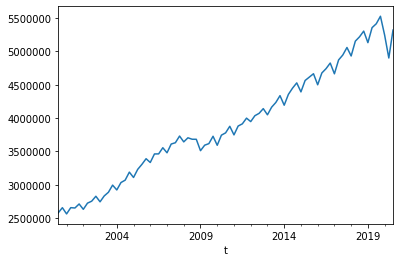

In [3]:
#plot time series

#plt.plot(gdp)
gdp.plot()

In [4]:
#check how data transformations changes time series
#visually assess stationarity

gdp_res = seasonal_decompose(gdp, model='multiplicative', two_sided = 1)
gdp_log_res = seasonal_decompose(np.log(gdp), model='multiplicative', two_sided = 1)

ts_gdp = pd.DataFrame(np.column_stack([gdp, #original TS
                                       np.log(gdp), #logarithm
                                       np.log(gdp).diff(), #first differences of logarithms
                                       np.log(gdp) - np.log(gdp).shift(4), #seasonal differences t-4 of logarithms
                                       gdp_res.trend, #seasonal decompose of raw data
                                       gdp_log_res.trend, #seasonal decompose of logarithms
                                       np.log(gdp_res.trend).diff(), #first differences of logarithms of seasonal decompose 
                                       gdp_log_res.trend.diff() #first differences of seasonal decompose of logarithms
                                      ]), 
                  columns=['raw data', 'logs', 'first differences', 'seasonally\n differenced logs t-4', 'seasonal_decompose\n raw data', 'seasonal_decompose\n log', 'log diff seasonal_decompose\n raw data', 'diff seasonal_decompose\n log'], 
                  index = gdp.index)

Text(0.5, 0.9, 'GDP')

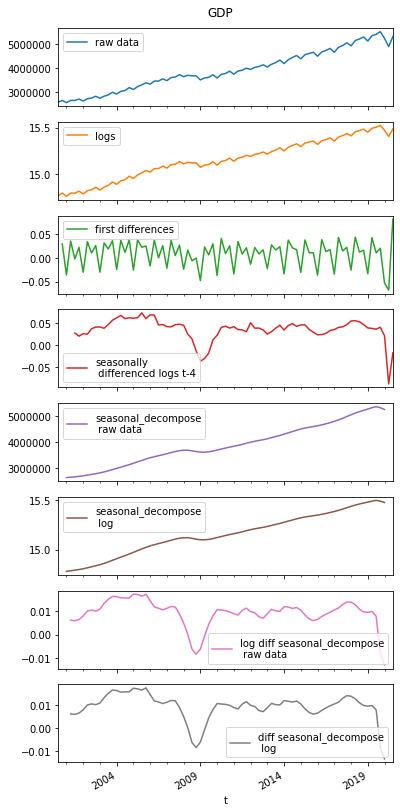

In [5]:
ts_gdp.plot(subplots=True, figsize=(6, 15)); plt.legend(loc='best')
plt.suptitle('GDP',x=0.5, y=0.9, fontsize=12)

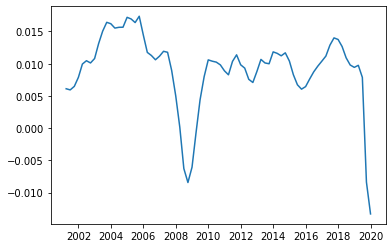

In [6]:
#If not seasonally adjusted: only log tranformation & differencing:
#np.log(gdp).plot()

diff_gdp = np.log(gdp).diff()

#Another method in numpy:
#diff_gdp_log = np.diff(np.log(gdp))

#plt.plot(diff_gdp_log)

#Seasonal adjustment:
#multiplicative model, dummy variables introduced, two sided, applied on logs:

res = seasonal_decompose(np.log(gdp), model='multiplicative', two_sided = 1)
#plt.plot(res.trend) #Adjusted
#print(res.trend)
#print(res.observed) #Observed
#plt.plot(res.trend)

#diff from trend:
diff_gdp_adj = res.trend.diff()
#diff_msi_log_adj
plt.plot(diff_gdp_adj)

### Investment dataset transformation

In [7]:
#import dataset from csv
#set up column names, t as index

colnames = ['t', 'Invest M$']
invest = pd.read_csv(r'datasets\NA000335Q.csv', header=0 , names = colnames, thousands=',', index_col = 0 , parse_dates = ['t'], squeeze=True)
invest

t
2000-07-01    535754.0
2000-10-01    511281.0
2001-01-01    475341.0
2001-04-01    490475.0
2001-07-01    511694.0
                ...   
2019-07-01    987751.0
2019-10-01    910888.0
2020-01-01    886373.0
2020-04-01    790309.0
2020-07-01    971978.0
Name: Invest M$, Length: 81, dtype: float64

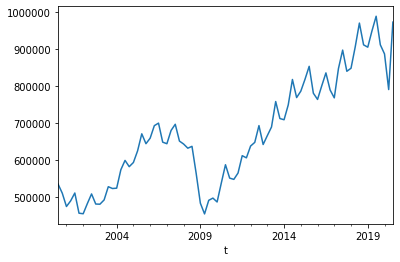

In [8]:
#plot time series
invest.plot()

In [9]:
#check how data transformations changes time series

invest_res = seasonal_decompose(invest, model='multiplicative', two_sided = 1)
invest_log_res = seasonal_decompose(np.log(invest), model='multiplicative', two_sided = 1)

ts_invest = pd.DataFrame(np.column_stack([invest, #original TS
                                       np.log(invest), #logarithm
                                       np.log(invest).diff(), #first differences of logarithms
                                       np.log(invest) - np.log(invest).shift(4), #seasonal differences t-4 of logarithms
                                       invest_res.trend, #seasonal decompose of raw data
                                       invest_log_res.trend, #seasonal decompose of logarithms
                                       np.log(invest_res.trend).diff(), #first differences of logarithms of seasonal decompose 
                                       invest_log_res.trend.diff() #first differences of seasonal decompose of logarithms
                                      ]), 
                  columns=['raw data', 'logs', 'first differences', 'seasonally\n differenced logs t-4', 'seasonal_decompose\n raw data', 'seasonal_decompose\n log', 'log diff seasonal_decompose\n raw data', 'diff seasonal_decompose\n log'], 
                  index = gdp.index)

Text(0.5, 0.9, 'Investment')

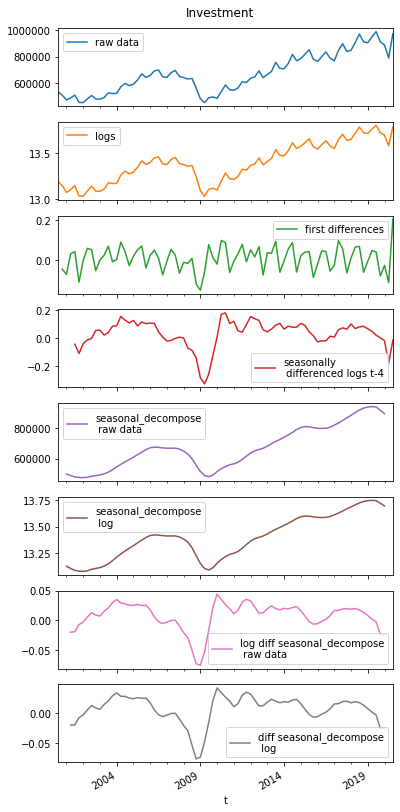

In [10]:
ts_invest.plot(subplots=True, figsize=(6, 15)); plt.legend(loc='best')
plt.suptitle('Investment',x=0.5, y=0.9, fontsize=12)

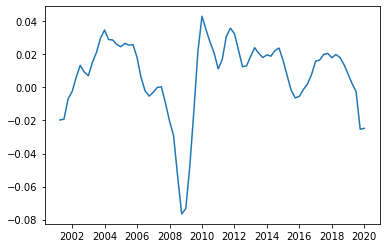

In [11]:
#If not seasonally adjusted: only log tranformation & differencing:

#np.log(invest).plot()
diff_invest = np.log(invest).diff()
#plt.plot(diff_invest_log)

#Seasonal adjustment:
#multiplicative model, dummy variables introduced, two sided, applied on logs:

res = seasonal_decompose(np.log(invest), model='multiplicative', two_sided = 1)
#plt.plot(res.trend)

#diff from trend:
diff_invest_adj = res.trend.diff()
#diff_msi_log_adj
plt.plot(diff_invest_adj)

### Correlation

compare size of two datasets

In [12]:
#drop NaN & print the size of dataset
diff_gdp_adj = diff_gdp_adj.dropna()
print("GDP: ", min(diff_gdp_adj.index)," to ",max(diff_gdp_adj.index))

diff_invest_adj = diff_invest_adj.dropna()
print("Investment: ", min(diff_invest_adj.index)," to ",max(diff_invest_adj.index))

#limiting datasource based on index:
#diff_gdp_adj = diff_gdp_adj[:'2020-01-01']

GDP:  2001-04-01 00:00:00  to  2020-01-01 00:00:00
Investment:  2001-04-01 00:00:00  to  2020-01-01 00:00:00


Pearson correlation - GDP & Investment seasonally adjusted

In [13]:
gdp_invest_corr_adj, gdp_invest_p_adj = stats.pearsonr (diff_invest_adj, diff_gdp_adj)
print(f"pearson r: {gdp_invest_corr_adj} and p-value: {gdp_invest_p_adj}")

pearson r: 0.8254856737807774 and p-value: 4.626650485720444e-20


check GDP as leading indicator by adding GDP lags

In [14]:
#define size of new series
#lags -> need to remove last observation, correlation with period t-1

#lag1_gdp = diff_gdp_adj[1:] #Deletes first observation
#lag1_gdp = diff_gdp_adj[0:(diff_gdp_adj.size-1)] #deletes last observation
#lag1_gdp #check

#removes last observation (leading indicator):
def lag(l, x):
    lag = x[0:(x.size-l)]
    return lag

#if one dataset is shorter than the other then size should match the shorter set: 
#def lag(l, x):
#    lag = x[(x.size-l-diff_invest_adj.size):(x.size-l)]
#    return lag


#removes first observation to match the size (lagging indicator):
def lead(l, x):
    lead = x[l:]
    return lead

#lead(3, diff_gdp_adj) #check

In [15]:
#empty data frames to store the results

cor_all = []
pval_all = []
lags = 4

#loop to check correlation when lags on GDP: t0 to t-4

for l in range(0, lags+1):
    lag_gdp = lag(l, diff_gdp_adj)
    lead_invest = lead(l, diff_invest_adj)
    #lead_invest = diff_invest_adj #if second dataset is shorter and will always be same size
    cor, pval = stats.pearsonr(lag_gdp, lead_invest)
    cor_all.append(cor)
    pval_all.append(pval)
cor_all_mat = np.asmatrix(cor_all)
pval_all_mat = np.asmatrix(pval_all)
lag_number = range(0, lags+1)

all = np.column_stack([lag_number, cor_all_mat.transpose(), pval_all_mat.transpose()])
df_corr_adj = pd.DataFrame(all, columns = ('Lag', 'Cor', 'Pval'))

In [16]:
df_corr_adj

,Lag,Cor,Pval
0,0.0,0.825486,4.626650e-20
1,1.0,0.780623,1.486172e-16
2,2.0,0.583022,5.022602e-08
3,3.0,0.312628,7.084354e-03
4,4.0,0.048045,6.885863e-01


Pearson correlation - GDP & Investment not seasonally adjusted

In [17]:
diff_gdp = diff_gdp.dropna()
print("GDP: ", min(diff_gdp.index)," to ",max(diff_gdp.index))

diff_invest = diff_invest.dropna()
print("Investment: ", min(diff_invest.index)," to ",max(diff_invest.index))

GDP:  2000-10-01 00:00:00  to  2020-07-01 00:00:00
Investment:  2000-10-01 00:00:00  to  2020-07-01 00:00:00


In [18]:
gdp_invest_corr, gdp_invest_p = stats.pearsonr (diff_invest, diff_gdp)
print(f"pearson r: {gdp_invest_corr} and p-value: {gdp_invest_p}")

pearson r: 0.38123271497060846 and p-value: 0.0004849590348790964


In [19]:
#size of new series lag & lead is already definied
#empty data frames to store the results

cor_all = []
pval_all = []
lags = 4

#loop to check correlation when lags on GDP: t0 to t-4

for l in range(0, lags+1):
    lag_gdp = lag(l, diff_gdp)
    lead_invest = lead(l, diff_invest)
    #lead_invest = diff_invest_adj #if second dataset is shorter and will always be same size
    cor, pval = stats.pearsonr(lag_gdp, lead_invest)
    cor_all.append(cor)
    pval_all.append(pval)
cor_all_mat = np.asmatrix(cor_all)
pval_all_mat = np.asmatrix(pval_all)
lag_number = range(0, lags+1)

all = np.column_stack([lag_number, cor_all_mat.transpose(), pval_all_mat.transpose()])
df_corr = pd.DataFrame(all, columns = ('Lag', 'Cor', 'Pval'))

In [20]:
df_corr

,Lag,Cor,Pval
0,0.0,0.381233,4.849590e-04
1,1.0,-0.069932,5.402631e-01
2,2.0,-0.541993,2.977741e-07
3,3.0,0.492832,5.281354e-06
4,4.0,0.053281,6.475877e-01


Results of Pearson correlation - seasonally & not seasonally adjusted

In [21]:
results = pd.merge(df_corr.add_suffix('_gdp'), df_corr_adj.add_suffix('_gdp_adj'), left_index = True, right_index = True)
results

,Lag_gdp,Cor_gdp,Pval_gdp,Lag_gdp_adj,Cor_gdp_adj,Pval_gdp_adj
0,0.0,0.381233,4.849590e-04,0.0,0.825486,4.626650e-20
1,1.0,-0.069932,5.402631e-01,1.0,0.780623,1.486172e-16
2,2.0,-0.541993,2.977741e-07,2.0,0.583022,5.022602e-08
3,3.0,0.492832,5.281354e-06,3.0,0.312628,7.084354e-03
4,4.0,0.053281,6.475877e-01,4.0,0.048045,6.885863e-01


In [22]:
#Pearson R summary

#results.rename(columns = {'Lag_gdp':'lag'}, inplace = True) 
#results['lag'] = results['lag'].astype(int)
results['Cor_gdp'] = results['Cor_gdp'].round(3)
results['Cor_gdp_adj'] = results['Cor_gdp_adj'].round(3)
results_cor = results[['Cor_gdp','Cor_gdp_adj']]

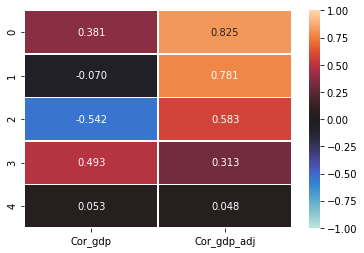

In [23]:
ax = sns.heatmap(results_cor, center = 0, annot = True, linewidths=.5, fmt=".3f", vmin=-1, vmax=1)
#cbar_kws= {'orientation': 'horizontal'}

In [24]:
#p-vale summary

#results['Pval_gdp'] = results['Pval_gdp'].round(3)
#results['Pval_gdp_adj'] = results['Pval_gdp_adj'].round(3)
results_p = results[['Pval_gdp','Pval_gdp_adj']]
results_p

,Pval_gdp,Pval_gdp_adj
0,4.849590e-04,4.626650e-20
1,5.402631e-01,1.486172e-16
2,2.977741e-07,5.022602e-08
3,5.281354e-06,7.084354e-03
4,6.475877e-01,6.885863e-01


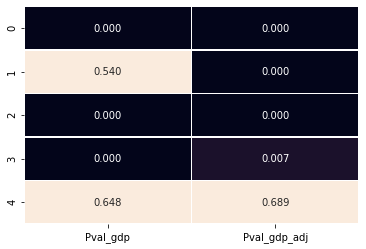

In [25]:
ax = sns.heatmap(results_p, annot = True, linewidths=.5, fmt=".3f", vmax=0.1, vmin=0, cbar=False)

Plotting the correlation results

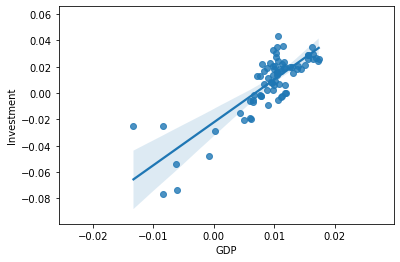

In [26]:
#plot GDP & Investment in t0 correlation

#scatterplot
ax = sns.regplot(x=diff_gdp_adj, y=diff_invest_adj)
#ax = sns.regplot(y=diff_invest, x=diff_gdp) #not seasonally adjusted

ax.set(xlabel='GDP', ylabel='Investment')
plt.show()

In [27]:
#plot all correlations: Investment & lagged GDP

#generate lagged columns
#create new dataframe with lagged columns

#need to start from a dataframe:
df = diff_gdp_adj.to_frame(name='GDP')

df_lagged = df.copy()
trailing_period = 4

for trailing in range(1, trailing_period + 1):
    lagged = df.shift(trailing)
    lagged.columns = [x + "_lagged-" + str(trailing) for x in df.columns]
    
    #newly created df must be called same as df copy, not as new one
    df_lagged = pd.concat((df_lagged, lagged), axis = 1)
    
#if need to remove NA:
#df_lagged = df_lagged.dropna()
df_lagged.head()

,GDP,GDP_lagged-1,GDP_lagged-2,GDP_lagged-3,GDP_lagged-4
t,,,,,
2001-04-01,0.006112,NaN,NaN,NaN,NaN
2001-07-01,0.005933,0.006112,NaN,NaN,NaN
2001-10-01,0.006478,0.005933,0.006112,NaN,NaN
2002-01-01,0.007877,0.006478,0.005933,0.006112,NaN
2002-04-01,0.009941,0.007877,0.006478,0.005933,0.006112


In [28]:
#new data frame combining x (lagged) & y

#using concat
#invest_gdp = pd.concat([diff_invest_adj, df_lagged], axis=1)

#using merge, both need to be data frames:
invest_gdp = df_lagged.merge(diff_invest_adj.to_frame(name='Investment'), left_index=True, right_index=True)
#invest_gdp
invest_gdp = invest_gdp.dropna()
invest_gdp.head()

,GDP,GDP_lagged-1,GDP_lagged-2,GDP_lagged-3,GDP_lagged-4,Investment
t,,,,,,
2002-04-01,0.009941,0.007877,0.006478,0.005933,0.006112,0.005962
2002-07-01,0.010457,0.009941,0.007877,0.006478,0.005933,0.013430
2002-10-01,0.010112,0.010457,0.009941,0.007877,0.006478,0.009337
2003-01-01,0.010799,0.010112,0.010457,0.009941,0.007877,0.007168
2003-04-01,0.013109,0.010799,0.010112,0.010457,0.009941,0.015080


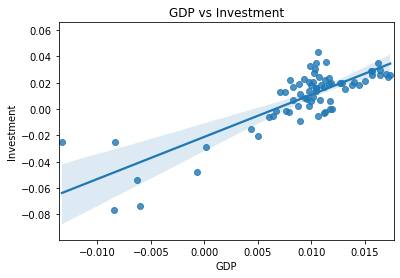

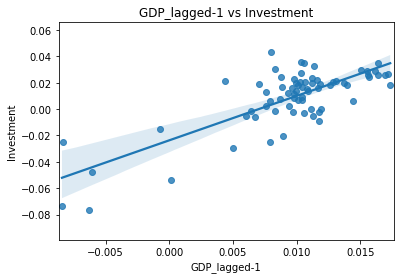

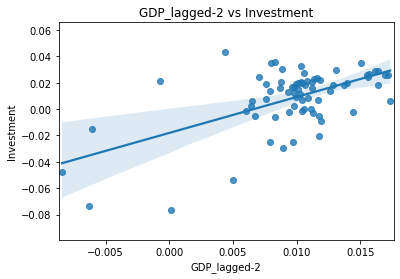

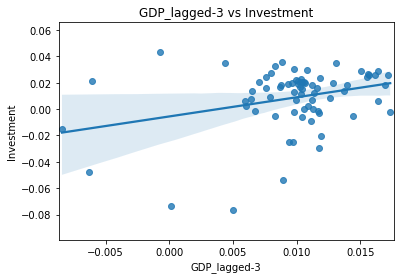

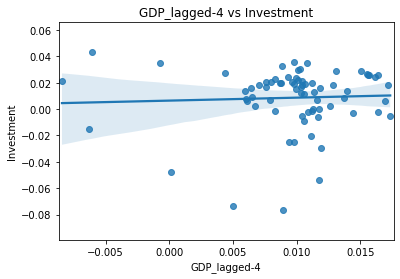

In [41]:
#plot all combinations

x_columns = ['GDP', 'GDP_lagged-1', 'GDP_lagged-2', 'GDP_lagged-3', 'GDP_lagged-4']
y_col = 'Investment'

for x_col in x_columns: 
    figure = plt.figure
    ax = sns.regplot(x=invest_gdp[x_col], y=invest_gdp[y_col])
    
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))
    
    #ax.autoscale_view()
    #manually set up axis limits
    dy = (max(invest_gdp[x_col]) - min(invest_gdp[x_col]))*0.01
    ax.set_xlim(min(invest_gdp[x_col])-dy, max(invest_gdp[x_col])+dy)    
    #ax.set_xlim(-0.01, 0.02)
    
    plt.show()